# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

weather_df = pd.DataFrame()

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for x in range(0,len(cities)):
    full_url = f'{weather_url}q={cities[x]}&units=imperial{weather_api_key}'
    response = requests.get(full_url)
    if response.status_code == 200:
        response = response.json()
        print(f'Processing Record {x+1} of {len(cities)} | {cities[x]}')
        cur_city_dict = {'City':cities[x], 'Lat':response['coord']['lat'],	'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'], 'Humidity':response['main']['humidity'], 'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],	'Country':response['sys']['country'],	'Date':response['dt']}
        weather_df = weather_df.append(cur_city_dict, ignore_index=True)
    else:
        print(f'City not found. Skipping')

print(f'----------------------------- Data Retrieval Complete -----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 623 | hami
Processing Record 2 of 623 | bubaque
Processing Record 3 of 623 | kapaa
Processing Record 4 of 623 | barrow
Processing Record 5 of 623 | nikolskoye
Processing Record 6 of 623 | kodiak
Processing Record 7 of 623 | baoqing
Processing Record 8 of 623 | gwadar
Processing Record 9 of 623 | cape town
Processing Record 10 of 623 | colares
Processing Record 11 of 623 | rikitea
Processing Record 12 of 623 | punta arenas
City not found. Skipping
Processing Record 14 of 623 | jijiga
Processing Record 15 of 623 | ribeira grande
Processing Record 16 of 623 | lebu
Processing Record 17 of 623 | kavieng
Processing Record 18 of 623 | albany
Processing Record 19 of 623 | victoria
Processing Record 20 of 623 | port-cartier
Processing Record 21 of 623 | thompson
City not found. Skipping
Processing Record 23 of 623 | smithers
Processing Record 24 of 623 | upernavik
Processing Record 25 of 623 | ponta do sol
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.to_csv(output_data_file, index=False)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hami,42.8000,93.4500,55.87,20,2,2.98,CN,1677997839
1,bubaque,11.2833,-15.8333,75.00,68,85,9.95,GW,1677997840
2,kapaa,22.0752,-159.3190,73.72,88,75,13.80,US,1677997840
3,barrow,71.2906,-156.7887,-18.38,69,20,21.85,US,1677997841
4,nikolskoye,59.7035,30.7861,28.80,94,100,1.92,RU,1677997841


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.256623,17.766372,54.629663,71.086879,58.874113,8.343741,1.677998e+09
std,33.766902,91.286952,27.852943,22.815919,41.987947,5.545060,1.102318e+02
min,-54.800000,-179.166700,-36.110000,9.000000,0.000000,0.000000,1.677997e+09
25%,-9.818900,-60.666225,34.960000,60.000000,9.750000,4.080000,1.677998e+09
50%,24.894150,23.529100,63.595000,78.000000,75.000000,7.370000,1.677998e+09
75%,47.668450,96.425025,77.567500,88.000000,100.000000,11.747500,1.677998e+09
max,78.218600,179.316700,101.280000,100.000000,100.000000,29.390000,1.677998e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitude vs. Max Temperature (03/04/23)'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

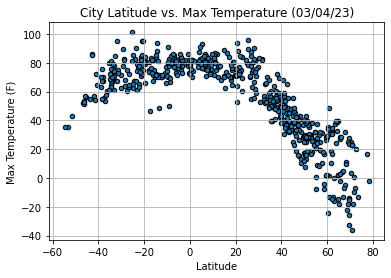

In [6]:
weather_df.plot(kind="scatter",x="Lat", y="Max Temp", grid=True, xlabel="Latitude",
                 ylabel="Max Temperature (F)", title= "City Latitude vs. Max Temperature (03/04/23)", edgecolor='k')

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitude vs. Humidity (03/04/23)'}, xlabel='Latitude', ylabel='Humidity (%)'>

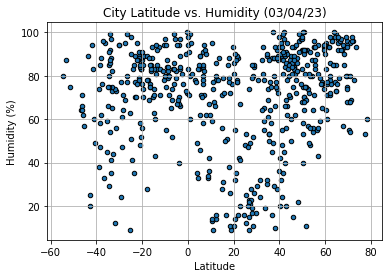

In [7]:
weather_df.plot(kind="scatter",x="Lat", y="Humidity", grid=True, xlabel="Latitude",
                 ylabel="Humidity (%)", title= "City Latitude vs. Humidity (03/04/23)", edgecolor='k')

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (03/04/23)'}, xlabel='Latitude', ylabel='Cloudiness (%)'>

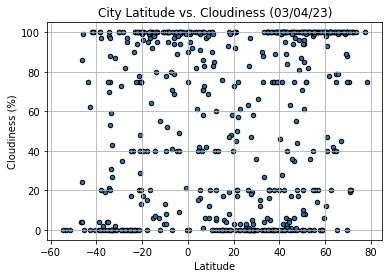

In [8]:
weather_df.plot(kind="scatter",x="Lat", y="Cloudiness", grid=True, xlabel="Latitude",
                 ylabel="Cloudiness (%)", title= "City Latitude vs. Cloudiness (03/04/23)", edgecolor='k')

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (03/04/23)'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

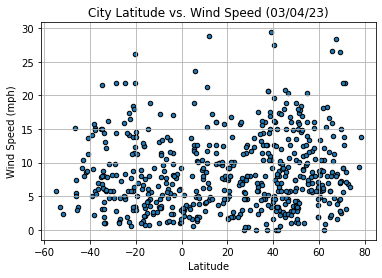

In [9]:
weather_df.plot(kind="scatter",x="Lat", y="Wind Speed", grid=True, xlabel="Latitude",
                 ylabel="Wind Speed (mph)", title= "City Latitude vs. Wind Speed (03/04/23)", edgecolor='k')

## Linear Regression

In [10]:
north_hemi_df = weather_df.loc[weather_df['Lat'] >= 0,:]
south_hemi_df = weather_df.loc[weather_df['Lat'] < 0,:]

In [11]:
def linearRegression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    global line_eq
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is:{rvalue}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.889126273829125


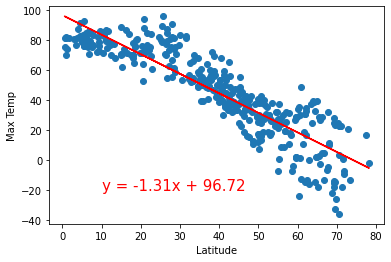

In [12]:
linearRegression(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.5109541093299035


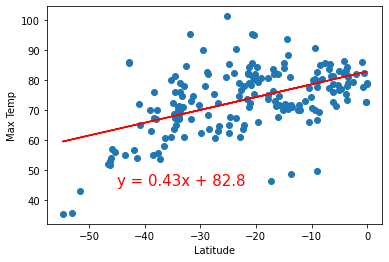

In [25]:
linearRegression(south_hemi_df['Lat'],south_hemi_df['Max Temp'])
plt.annotate(line_eq,(-45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.32170638735313106


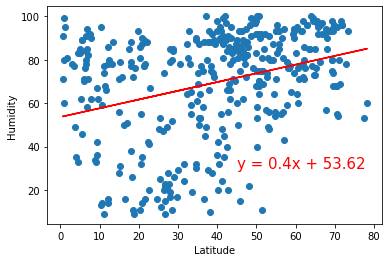

In [24]:
linearRegression(north_hemi_df['Lat'],north_hemi_df['Humidity'])
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.27562062185181935


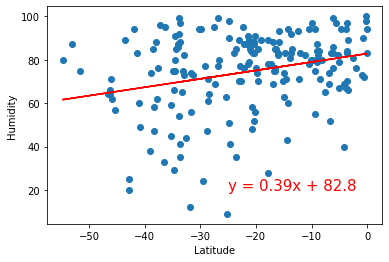

In [22]:
linearRegression(south_hemi_df['Lat'],south_hemi_df['Humidity'])
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.25194065790022246


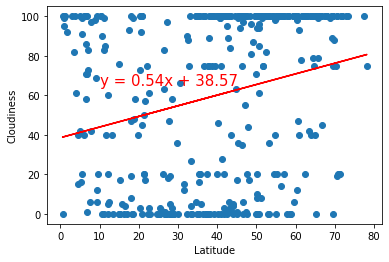

In [16]:
linearRegression(north_hemi_df['Lat'],north_hemi_df['Cloudiness'])
plt.annotate(line_eq,(10,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.3708745329155055


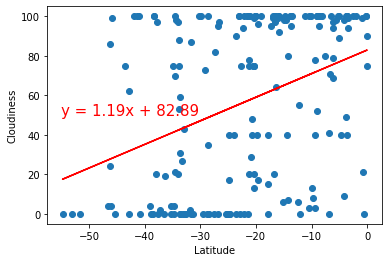

In [21]:
linearRegression(south_hemi_df['Lat'],south_hemi_df['Cloudiness'])
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.11039711501129817


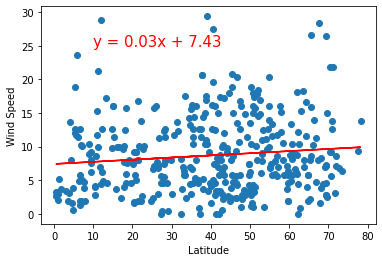

In [19]:
linearRegression(north_hemi_df['Lat'],north_hemi_df['Wind Speed'])
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.1764191564102708


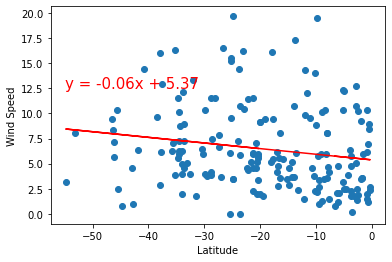

In [71]:
linearRegression(south_hemi_df['Lat'],south_hemi_df['Wind Speed'])
plt.annotate(line_eq,(-55,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()